# Notebook 3: DNAtype Classification

## Plan for Modeling:

With modeling I will start with a Logistic Regression

In [91]:
#imports
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats

%matplotlib inline

import warnings

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import hstack, unique, vstack, where
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import (accuracy_score, auc, classification_report,
                             confusion_matrix, f1_score, plot_confusion_matrix,
                             plot_roc_curve, precision_score, recall_score,
                             roc_auc_score, roc_curve)
from sklearn.model_selection import (GridSearchCV, cross_val_score,
                                     train_test_split)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import silhouette_score
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from pandas import MultiIndex, Int16Dtype




#warnings.filterwarnings("ignore")
np.random.seed(123)


In [62]:
#import the data

codon = joblib.load('../data/codon_after_eda.pkl')

In [63]:
sns.set_theme(style="darkgrid")

In [64]:
codon

,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,7.598900,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,7.296413,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,8.489411,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,7.557995,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,10.035918,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13023,vrt,0,9601,7.001246,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13024,vrt,1,9601,7.634337,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13025,vrt,1,9602,7.430707,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13026,vrt,0,9606,17.520819,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [65]:
codon.shape

(12964, 69)

<AxesSubplot:>

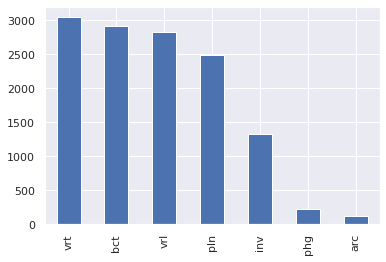

In [66]:
codon['Kingdom'].value_counts().plot(kind='bar')

<AxesSubplot:>

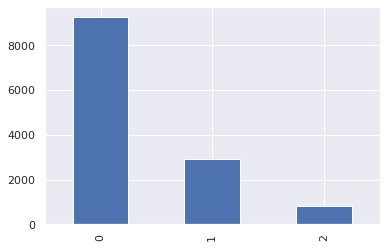

In [67]:
codon['DNAtype'].value_counts().plot(kind='bar')

In [68]:
codon.describe()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,...,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000,12964.000000
mean,0.349506,130573.312635,8.513725,0.024712,0.023460,0.020553,0.014084,0.017822,0.018338,0.019082,...,0.005441,0.009918,0.006431,0.024155,0.021198,0.028260,0.021707,0.001640,0.000591,0.006201
std,0.594362,124773.296344,1.647012,0.017437,0.011608,0.020605,0.009264,0.010602,0.014580,0.024299,...,0.006603,0.008575,0.006399,0.013844,0.013033,0.014348,0.015024,0.001788,0.000883,0.010363
min,0.000000,7.000000,6.908755,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28897.000000,7.382591,0.013910,0.015397,0.005600,0.007090,0.010880,0.007860,0.005310,...,0.001220,0.001678,0.001160,0.012307,0.011890,0.017340,0.009747,0.000560,0.000000,0.000410
50%,0.000000,82005.000000,7.984803,0.021720,0.021920,0.015225,0.013345,0.016130,0.014600,0.009690,...,0.003520,0.009260,0.004550,0.025365,0.019105,0.026035,0.020585,0.001370,0.000420,0.001130
75%,1.000000,223048.250000,9.117731,0.031232,0.029250,0.029370,0.019790,0.022730,0.025160,0.017212,...,0.007110,0.015893,0.010300,0.034200,0.027692,0.036790,0.031160,0.002370,0.000830,0.002920
max,2.000000,465364.000000,17.520819,0.217300,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


---

In [69]:
#assigning the target and features y and X

X = codon.drop(columns=['Kingdom','DNAtype', 'SpeciesName']) #features
y = codon['DNAtype'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

# Vanilla Models:

Plan:

Pipeline

Logistic Regression
kNN
Decision Tree


XGBoost
KMeans, check clusters
neural network analysis
k

In [70]:
#Vanilla models pipeline


estimators = [('scaler', StandardScaler()), ('model', KNeighborsClassifier())]

pipe = Pipeline(estimators)

parameters = [{'model': [KNeighborsClassifier()],
                'scaler': [StandardScaler(), MinMaxScaler()]},
                

                {'model': [LogisticRegression()],
                'scaler': [StandardScaler(), MinMaxScaler(), None]},


                {'model': [DecisionTreeClassifier()],
                'scaler': [None]}]


In [71]:
#Gridsearch for vanilla 
gridsearch = GridSearchCV(pipe, parameters, cv=5)

#fit to train data
fittedgrid = gridsearch.fit(X_train, y_train)

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

In [72]:
dna0_results_df = pd.DataFrame.from_dict(gridsearch.cv_results_, orient='columns')
print(dna0_results_df.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_model', 'param_scaler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


In [73]:
dna0_results_df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_scaler,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.118804,0.023548,0.002374,0.000408,LogisticRegression(),StandardScaler(),"{'model': LogisticRegression(), 'scaler': Stan...",0.993735,0.995178,0.994696,0.994214,0.992285,0.994022,0.000993,1
0,0.012044,0.002555,0.075175,0.024766,KNeighborsClassifier(),StandardScaler(),"{'model': KNeighborsClassifier(), 'scaler': St...",0.993253,0.994696,0.992768,0.993732,0.992768,0.993443,0.000721,2
1,0.009167,0.000109,0.066464,0.008286,KNeighborsClassifier(),MinMaxScaler(),"{'model': KNeighborsClassifier(), 'scaler': Mi...",0.992289,0.995661,0.993250,0.991803,0.990839,0.992768,0.001642,3
3,0.078198,0.005039,0.002152,0.000273,LogisticRegression(),MinMaxScaler(),"{'model': LogisticRegression(), 'scaler': MinM...",0.991807,0.991803,0.988910,0.992285,0.988428,0.990647,0.001631,4
5,0.378864,0.049318,0.001684,0.000102,DecisionTreeClassifier(),None,"{'model': DecisionTreeClassifier(), 'scaler': ...",0.978795,0.979749,0.975892,0.978303,0.972517,0.977051,0.002600,5
4,0.038283,0.006215,0.001540,0.000046,LogisticRegression(),None,"{'model': LogisticRegression(), 'scaler': None}",0.713253,0.713597,0.713597,0.713597,0.713115,0.713432,0.000207,6


## Logistic Regression:

Distributions before and after SMOTE upsampling:


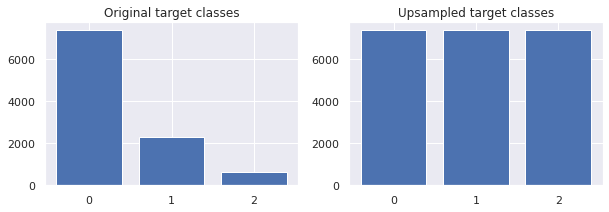

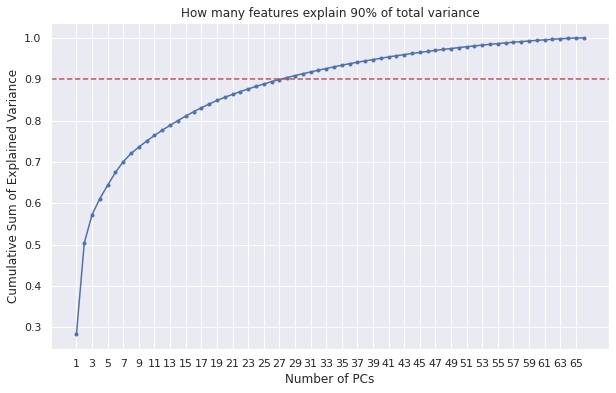

In [74]:
#Using SMOTE to balance the classes:

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

#Plotting distributions
print('Distributions before and after SMOTE upsampling:')
plt.subplots(1, 2, figsize=(10, 3))

# Plot the original data
plt.subplot(1,2,1)
plt.bar(y_train.value_counts().index, y_train.value_counts())
plt.title('Original target classes')
plt.xticks(ticks=[0, 1, 2])

# Plot the upsampled data
plt.subplot(1,2,2)
plt.bar(y_train_sm.value_counts().index, y_train_sm.value_counts())
plt.title('Upsampled target classes')
plt.xticks(ticks=[0, 1, 2])

plt.show()
print('==============================================================================')

#scaling data for PCA tranform
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_sm) #scaling the upsampled set
X_test_scaled = scaler.transform(X_test)

#PCA dimensionality reduction
pca = PCA()

# fit transform train set and transform test set
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
explained_variance = pca.explained_variance_ratio_ #to see the number of features that account for the highest variance

#cumulative sum of the explained variance
cumulative_sum = np.cumsum(explained_variance)

#plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X_train.columns)+1), cumulative_sum, marker='.')
plt.axhline(0.9, c='r', linestyle='--')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1, len(X_train.columns)+1, 2))
plt.title("How many features explain 90% of total variance")
plt.show()



In [75]:
#setting n_components and refitting a PCA

pca_0 = PCA(n_components= 27)

# fit transform train set and transform test set
X_train_PCA_0 = pca_0.fit_transform(X_train_scaled)
X_test_PCA_0 = pca_0.transform(X_test_scaled)

In [76]:
#regularisation:

c_params = [0.0001, 0.001, 0.01, 0.1, 1, 10]

train_accuracies = []
test_accuracies = []

for c in c_params:
    logi_reg = LogisticRegression(C=c, max_iter= 10000)

    logi_reg.fit(X_train_PCA_0, y_train_sm)

    train_accuracies.append(logi_reg.score(X_train_PCA_0, y_train_sm))
    test_accuracies.append(logi_reg.score(X_test_PCA_0, y_test))

Text(0.5, 1.0, 'Accuracies for logi_reg model')

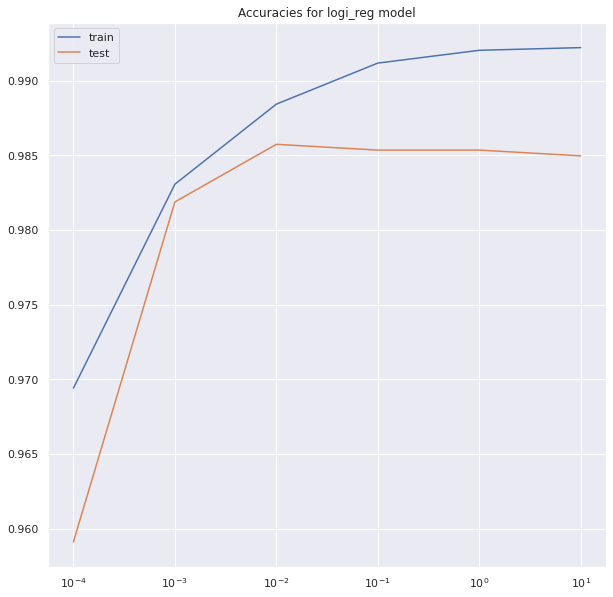

In [77]:
plt.figure(figsize=(10, 10))
plt.plot(c_params, train_accuracies, label = 'train')
plt.plot(c_params, test_accuracies, label = 'test')
plt.xscale('log')
plt.legend()
plt.title('Accuracies for logi_reg model')

In [78]:
#For C =0.001~

log_reg_0 = LogisticRegression(C=0.001, max_iter= 10000)

log_reg_0.fit(X_train_PCA_0, y_train_sm)

print(log_reg_0.score(X_train_PCA_0, y_train_sm))
print(log_reg_0.score(X_test_PCA_0, y_test))

0.9830607739784656
0.9818742768993444


,Predicted 0,Predicted 1,Predicted 2
True 0,1818,7,25
True 1,3,568,9
True 2,2,1,160


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


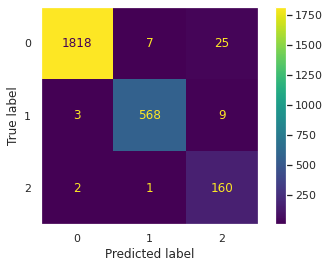

In [79]:
y_predicted = log_reg_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_predicted)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])

display(cf_df)
sns.set_theme(style="dark")
plot_confusion_matrix(log_reg_0, X_test_PCA_0, y_test)

In [80]:
class_report_log_0 = classification_report(y_test, y_predicted)
print(class_report_log_0)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1850
           1       0.99      0.98      0.98       580
           2       0.82      0.98      0.90       163

    accuracy                           0.98      2593
   macro avg       0.94      0.98      0.96      2593
weighted avg       0.98      0.98      0.98      2593



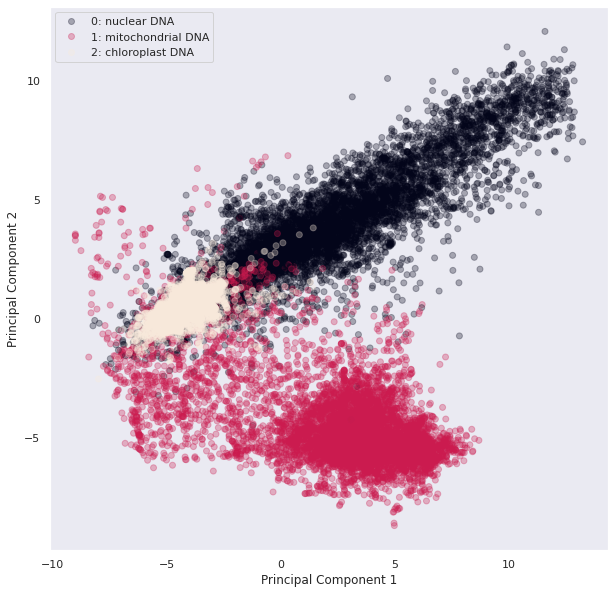

In [81]:
#Visualising the PCA components in a scatter graph
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_train_PCA_0[:, 0], X_train_PCA_0[:, 1], alpha=0.3, c=y_train_sm)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
classes = ['0: nuclear DNA', '1: mitochondrial DNA', '2: chloroplast DNA']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

## kNearest Neighbors model:

In [82]:
#using the already scaled and PCA tranformed sets from previous model

#Determining the ideal n_neighbors value:

n_neighbors = range(1, 100, 2)

train_accuracies_0 = []
test_accuracies_0 = []

for n in n_neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train_PCA_0, y_train_sm)
    
    train_accuracies_0.append(KNN_model.score(X_train_PCA_0, y_train_sm))
    test_accuracies_0.append(KNN_model.score(X_test_PCA_0, y_test))

Text(0.5, 1.0, 'Accuracies for KNN_model')

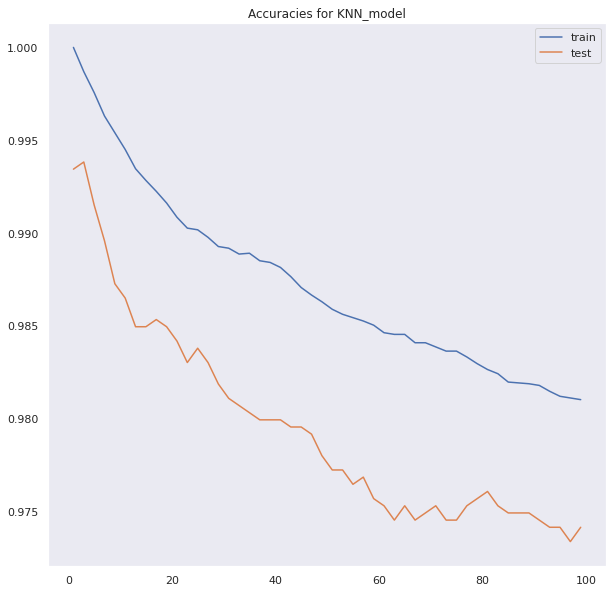

In [83]:
plt.figure(figsize=(10, 10))
plt.plot(n_neighbors, train_accuracies_0, label = 'train')
plt.plot(n_neighbors, test_accuracies_0, label = 'test')
plt.legend()
plt.title('Accuracies for KNN_model')

In [84]:
Knn_accuracies_df = pd.DataFrame({'number of neighbors':n_neighbors, 'Train scores':train_accuracies_0, 'Test scores': test_accuracies_0})
Knn_accuracies_df.head(5)

,number of neighbors,Train scores,Test scores
0,1,1.000000,0.993444
1,3,0.998694,0.993830
2,5,0.997567,0.991516
3,7,0.996306,0.989587
4,9,0.995405,0.987273


In [85]:
KNN_model_0 = KNeighborsClassifier(n_neighbors = 3)
KNN_model_0.fit(X_train_PCA_0, y_train_sm)

print(KNN_model_0.score(X_train_PCA_0, y_train_sm))
print(KNN_model_0.score(X_test_PCA_0, y_test))

0.9986935171419561
0.9938295410721172


,Predicted 0,Predicted 1,Predicted 2
True 0,1842,2,6
True 1,1,575,4
True 2,3,0,160


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


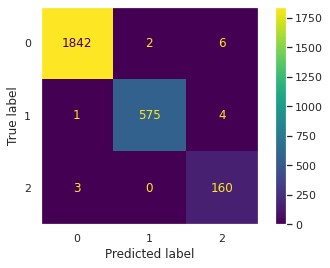

In [86]:
y_predicted_0 = KNN_model_0.predict(X_test_PCA_0)

# Generate confusion matrix
cf_matrix_0 = confusion_matrix(y_test, y_predicted_0)

# label rows and columns
cf_df_0 = pd.DataFrame(
    cf_matrix_0, 
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])

display(cf_df_0)
sns.set_theme(style="dark")
plot_confusion_matrix(KNN_model_0, X_test_PCA_0, y_test)

In [87]:
class_report_knn_0 = classification_report(y_test, y_predicted_0)
print(class_report_knn_0)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1850
           1       1.00      0.99      0.99       580
           2       0.94      0.98      0.96       163

    accuracy                           0.99      2593
   macro avg       0.98      0.99      0.98      2593
weighted avg       0.99      0.99      0.99      2593



## XGBoost model:

In [107]:
maxdepth = range(10)

train_accuracies_1 = []
test_accuracies_1 = []

for d in maxdepth:
    XGB_model = XGBClassifier(max_depth= d, use_label_encoder=False)
    XGB_model.fit(X_train, y_train)
    
    train_accuracies_1.append(XGB_model.score(X_train, y_train))
    test_accuracies_1.append(XGB_model.score(X_test, y_test))

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:03:58] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:03:59] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:00] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:02] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:04] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:06] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:09] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:12] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:14] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:04:17] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,max Depth,Train scores,Test scores
3,3,1.000000,0.994987
5,5,1.000000,0.994987
4,4,1.000000,0.994601
6,6,1.000000,0.994601
8,8,1.000000,0.994601
9,9,1.000000,0.994601
2,2,0.999904,0.994215
7,7,1.000000,0.993830
1,1,0.995950,0.991901
0,0,0.713432,0.713459


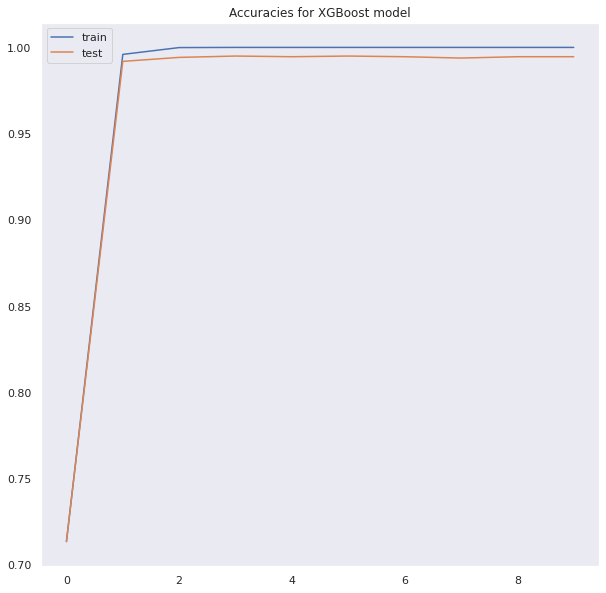

In [114]:
plt.figure(figsize=(10, 10))
plt.plot(maxdepth, train_accuracies_1, label = 'train')
plt.plot(maxdepth, test_accuracies_1, label = 'test')
plt.legend()
plt.title('Accuracies for XGBoost model')


XGB_accuracies_df = pd.DataFrame({'max Depth':maxdepth, 'Train scores':train_accuracies_1, 'Test scores': test_accuracies_1})
XGB_accuracies_df.sort_values(by='Test scores', ascending=False).head(10)



In [117]:
#XGBoost with max+depth = 3

XGB_model_0 = XGBClassifier(max_depth= 3, use_label_encoder=False)
XGB_model_0.fit(X_train, y_train)

print(f'XGBoost train accuracy: {XGB_model_0.score(X_train, y_train)}')
print(f'XGBoost test accuracy: {XGB_model_0.score(X_test, y_test)}')

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:08:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost train accuracy: 1.0
XGBoost test accuracy: 0.9949865021210953


,Predicted 0,Predicted 1,Predicted 2
True 0,1848,1,1
True 1,4,575,1
True 2,4,2,157


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1850
           1       0.99      0.99      0.99       580
           2       0.99      0.96      0.98       163

    accuracy                           0.99      2593
   macro avg       0.99      0.98      0.99      2593
weighted avg       0.99      0.99      0.99      2593



/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


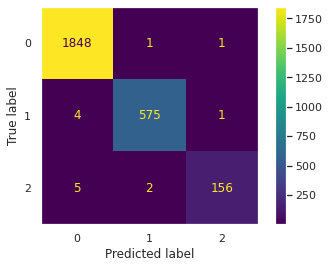

In [122]:
y_predicted_1 = XGB_model_0.predict(X_test)

# Generate confusion matrix
cf_matrix_1 = confusion_matrix(y_test, y_predicted_1)

# label rows and columns
cf_df_1 = pd.DataFrame(
    cf_matrix_1, 
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])

print('==========================================================')

display(cf_df_1)
sns.set_theme(style="dark")
plot_confusion_matrix(XGB_model, X_test, y_test)

print('==========================================================')


#Precision Recall and F1 scores
class_report_xgb_0 = classification_report(y_test, y_predicted_1)
print(class_report_xgb_0)
print('==========================================================')


## DBSCAN model:

In [20]:
#df scaled 

codon_num = codon.drop(columns= ['SpeciesName', 'SpeciesID', 'Kingdom'])
codon_log = np.log(codon_num +1)

my_ss = StandardScaler()

X = my_ss.fit_transform(codon_log)
codon_scaled = pd.DataFrame(data = X, columns = codon_log.columns)

In [34]:
#running t-sne on a sample of the data 

sample = codon_scaled.sample(frac=0.4, random_state = 123)

# Instantiate t-SNE
tsne_0 = TSNE(n_components = 3, random_state = 123, verbose = 1)
# Fit_Transform t-SNE
tsne_data = tsne_0.fit_transform(sample)

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5186 samples in 0.001s...
[t-SNE] Computed neighbors for 5186 samples in 0.277s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5186
[t-SNE] Computed conditional probabilities for sample 2000 / 5186
[t-SNE] Computed conditional probabilities for sample 3000 / 5186
[t-SNE] Computed conditional probabilities for sample 4000 / 5186
[t-SNE] Computed conditional probabilities for sample 5000 / 5186
[t-SNE] Computed conditional probabilities for sample 5186 / 5186
[t-SNE] Mean sigma: 1.814777
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.453011
[t-SNE] KL divergence after 1000 iterations: 1.032878


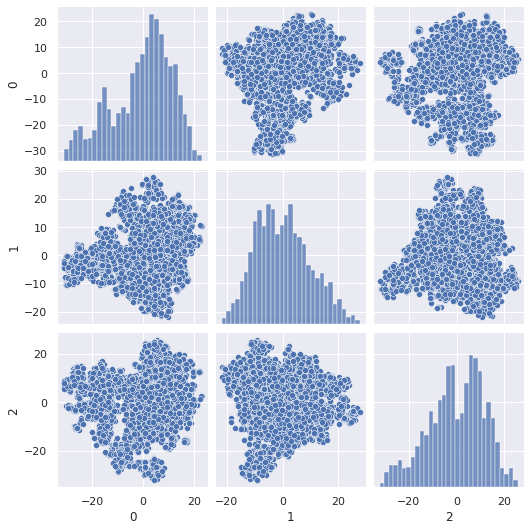

In [35]:
sns.pairplot(pd.DataFrame(tsne_data))

In [75]:
#Finding the optimal epsilon value
eps_range = np.arange(1, 10, 1)
num_clusters = []
silhouette_scores = []

for epsilon in eps_range:
    #instantiate model
    model = DBSCAN(eps = epsilon, min_samples = 3)
    
    y_labels = model.fit_predict(codon_scaled)
    
    silhouette = silhouette_score(codon_scaled, y_labels)
    silhouette_scores.append(silhouette)
    
    n_clusters = len(np.unique(y_labels[y_labels != -1]))
    
    num_clusters.append(n_clusters)
    
    print(f'eps = {epsilon}, --- n_clusters: {n_clusters} --- silhouette: {silhouette}')

eps = 1, --- n_clusters: 174 --- silhouette: -0.4443731801004897
eps = 2, --- n_clusters: 425 --- silhouette: -0.31254317959110794
eps = 3, --- n_clusters: 387 --- silhouette: -0.24844087396940037
eps = 4, --- n_clusters: 144 --- silhouette: -0.2684692036660212
eps = 5, --- n_clusters: 53 --- silhouette: -0.22707793402654664
eps = 6, --- n_clusters: 18 --- silhouette: -0.005561840861856768
eps = 7, --- n_clusters: 12 --- silhouette: 0.09129104978278507
eps = 8, --- n_clusters: 8 --- silhouette: 0.16153497047356954
eps = 9, --- n_clusters: 3 --- silhouette: 0.41065064649913474


In [76]:
dbscan_model = DBSCAN(eps = 9, min_samples = 3)
dbscan_y_labels = dbscan_model.fit_predict(codon_scaled)

# Let's add our labels to the dataset so we can colour our clusters on graphs. 
codon_dbscan = codon_scaled.copy()
codon_dbscan['dbscan_labels'] = dbscan_y_labels

sample = codon_dbscan.sample(frac=0.4, random_state = 1)

# Instantiate t-SNE
tsne_0 = TSNE(n_components = 3, random_state = 1, verbose = 1)
# Fit_Transform t-SNE
tsne_data_0 = tsne_0.fit_transform(sample.drop('dbscan_labels', axis = 1))

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5186 samples in 0.001s...
[t-SNE] Computed neighbors for 5186 samples in 0.303s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5186
[t-SNE] Computed conditional probabilities for sample 2000 / 5186
[t-SNE] Computed conditional probabilities for sample 3000 / 5186
[t-SNE] Computed conditional probabilities for sample 4000 / 5186
[t-SNE] Computed conditional probabilities for sample 5000 / 5186
[t-SNE] Computed conditional probabilities for sample 5186 / 5186
[t-SNE] Mean sigma: 1.797412
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.431404
[t-SNE] KL divergence after 1000 iterations: 1.049127


In [77]:
tsne_0_df = pd.DataFrame(tsne_data_0, columns = [f'tSNE D{i+1}' for i in range(tsne_data_0.shape[1])])
tsne_0_df['dbscan_labels'] = sample['dbscan_labels'].values

<Figure size 720x720 with 0 Axes>

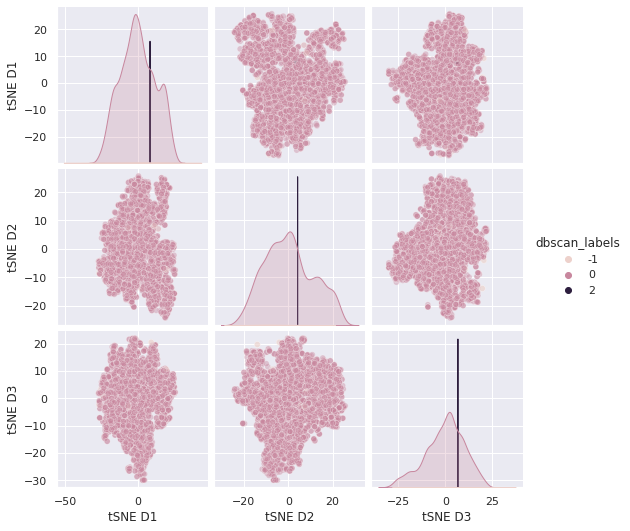

In [78]:
plt.figure(figsize=(10, 10))
sns.pairplot(tsne_0_df, hue = 'dbscan_labels', plot_kws={'alpha':0.4})

## Ensemble Model

In [128]:
# We instantiate the base models, along with their names
base_models = [('KNN', KNN_model_0),
               ('XGBoost', XGB_model_0),
               ('Logistic', log_reg_0)
               ]


# building the stacked model
stacked_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression())

stacked_model.fit(X_train, y_train)

/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:30:22] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[00:30:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:27] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:29] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:30:31] WARNING: /tmp/abs_40obctay9q/croots/re

StackingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=3)),
                               ('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              enable_categorical=False, gamma=0,
                                              gpu_id=-1, importance_type=None,
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=3,
                                              min_child_weig...
                                              monotone_constraints='()',
                                              n_estimators=100, n_jobs=8,
                                              num_parallel_tree=1,
                                              objective='multi:softprob',
                                              predictor='auto', random_state=0,
                                              reg_alpha=0, reg_lambda=1,
                                              scale_pos_weight=None,
                                              subsample=1, tree_method='exact',
                                              use_label_encoder=False,
                                              validate_parameters=1,
                                              verbosity=None)),
                               ('Logistic',
                                LogisticRegression(C=0.001, max_iter=10000))],
                   final_estimator=LogisticRegression())

In [129]:
print(f'Stacked model train accuracy: {stacked_model.score(X_train, y_train)}')
print(f'Stacked model test accuracy: {stacked_model.score(X_test, y_test)}')

Stacked model train accuracy: 1.0
Stacked model test accuracy: 0.9949865021210953


,Predicted 0,Predicted 1,Predicted 2
True 0,1848,1,1
True 1,4,575,1
True 2,4,2,157


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1850
           1       0.99      0.99      0.99       580
           2       0.99      0.96      0.98       163

    accuracy                           0.99      2593
   macro avg       0.99      0.98      0.99      2593
weighted avg       0.99      0.99      0.99      2593



/home/amina/anaconda3/envs/plotly_bokeh/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


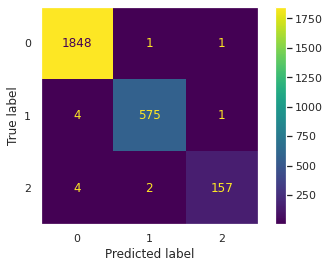

In [130]:
y_predicted_2 = stacked_model.predict(X_test)

# Generate confusion matrix
cf_matrix_2 = confusion_matrix(y_test, y_predicted_2)

# label rows and columns
cf_df_2 = pd.DataFrame(
    cf_matrix_2, 
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"])

print('==========================================================')

display(cf_df_2)
sns.set_theme(style="dark")
plot_confusion_matrix(stacked_model, X_test, y_test)

print('==========================================================')


#Precision Recall and F1 scores
class_report_stack_0 = classification_report(y_test, y_predicted_2)
print(class_report_stack_0)
print('==========================================================')

---

In [20]:
print(f'train score: {knnquick.score(X_train_dna, y_train_dna)}')
print(f'test score: {knnquick.score(X_test_dna, y_test_dna)}')

NameError: name 'knnquick' is not defined

In [ ]:
#PCA dimensionality reduction
#Scaling the data:
    # instantiate scaler
data_scaler = StandardScaler()
    # fit scaler
X_train_dna_scaled = data_scaler.fit_transform(X_train_dna)
X_test_dna_scaled = data_scaler.transform(X_test_dna)

# PCA with n_components to explain 90% of the variance in the data 
    # instantiate 
pca = PCA(n_components=0.9)

#fit and Tranform train and transform test
X_train_dna_pca = pca.fit_transform(X_train_dna_scaled)
X_test_dna_pca = pca.transform(X_test_dna_scaled)

In [ ]:
knnquickscale = KNeighborsClassifier(n_neighbors=2)

knnquickscale.fit(X_train_dna_scaled, y_train_dna)

print(f'train score: {knnquickscale.score(X_train_dna_scaled, y_train_dna)}')
print(f'test score: {knnquickscale.score(X_test_dna_scaled, y_test_dna)}')

train score: 0.9979751229389644
test score: 0.9953721558040879


In [ ]:
X_train_dna_pca.shape

(10371, 31)

In [ ]:
y_train_dna.shape

(10371,)

In [ ]:
def PlotBoundaries(model, X, Y, plotsize=(6,4)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=plotsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

In [ ]:
PlotBoundaries(knnquickscale, X_dna, y_dna, plotsize=(6,4))

InvalidIndexError: (slice(None, None, None), 0)

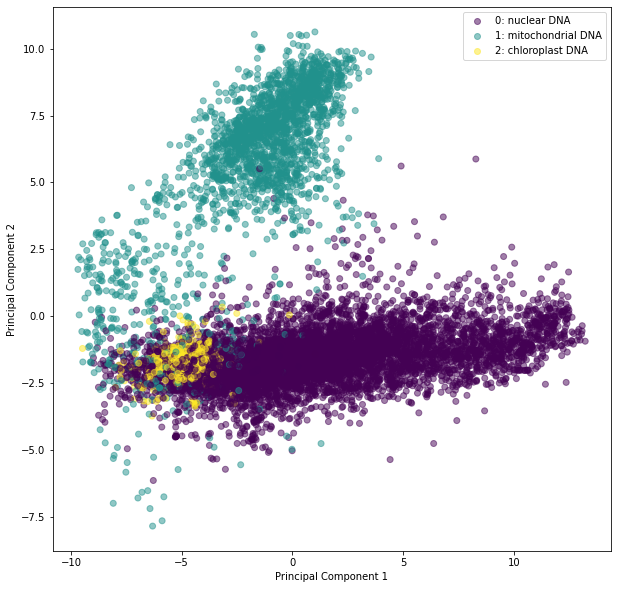

In [ ]:
plt.figure(figsize=(10, 10))
scatter = plt.scatter(X_train_dna_pca[:, 0], X_train_dna_pca[:, 1], alpha=0.5, c=y_train_dna)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
classes = ['0: nuclear DNA', '1: mitochondrial DNA', '2: chloroplast DNA']
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

In [ ]:
total_var = pca.explained_variance_ratio_.sum() * 100


In [ ]:
fig = px.scatter_3d(
    X_train_dna_pca, x=0, y=1, z=2, color=y_train_dna,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
neighbors = range(1, 100, 2) # Only try odd numbers of neighbours

train_acc = []
test_acc = []

for n in neighbors:
    KNN_model = KNeighborsClassifier(n_neighbors = n)
    KNN_model.fit(X_train_dna_pca, y_train_dna)
    
    train_acc.append(KNN_model.score(X_train_dna_pca, y_train_dna))
    test_acc.append(KNN_model.score(X_test_dna_pca, y_test_dna))

Text(0.5, 1.0, 'Accuracies on SCALED data')

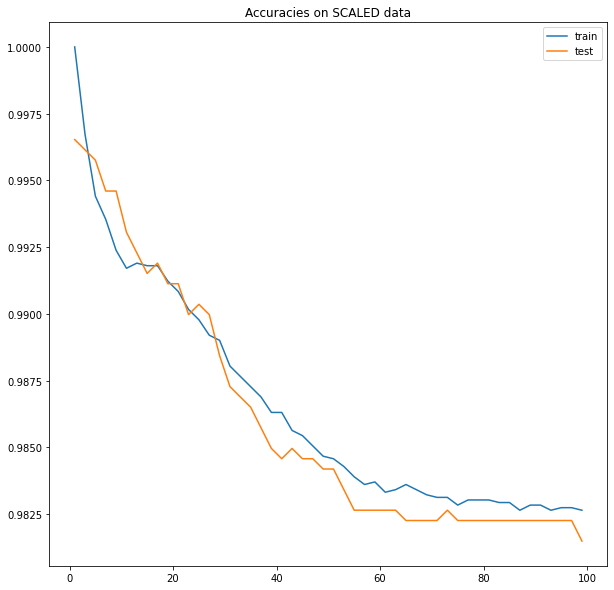

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(neighbors, train_acc, label = 'train')
plt.plot(neighbors, test_acc, label = 'test')
plt.legend()
plt.title('Accuracies on SCALED data')

In [ ]:
#Instantiate the mode
knn_optimised = KNeighborsClassifier(n_neighbors = 10)

#fit the model
knn_optimised.fit(X_train_dna_pca, y_train_dna)

print(f"Score on training set: {knn_optimised.score(X_train_dna_pca, y_train_dna):0.3f}")
print(f"Score on test set: {knn_optimised.score(X_test_dna_pca, y_test_dna):0.3f}")

Score on training set: 0.992
Score on test set: 0.993


In [ ]:
# Get class predictions
y_pred = knn_optimised.predict(X_test_dna_pca)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test_dna, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted 0", "Predicted 1", "Predicted 2"],
    index=["True 0", "True 1", "True 2"]
)

display(cf_df)

,Predicted 0,Predicted 1,Predicted 2
True 0,1847,0,3
True 1,3,573,4
True 2,7,0,156


<Figure size 720x720 with 0 Axes>

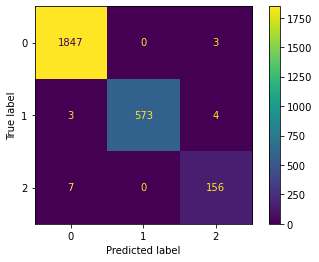

In [ ]:
plt.figure(figsize=(10, 10))
plot_confusion_matrix(knn_optimised, X_test_dna_pca, y_test_dna)
plt.show()

In [ ]:
knn_optimised.

<10371x10371 sparse matrix of type '<class 'numpy.float64'>'
	with 103710 stored elements in Compressed Sparse Row format>

In [ ]:
#vanilla regression 

reg_model_vanilla = LogisticRegression(C = 2, solver='lbfgs', random_state=123)

reg_model_vanilla.fit(X_train_dna, y_train_dna)

print(f"Score on training set: {reg_model_vanilla.score(X_train_dna, y_train_dna):0.3f}")
print(f"Score on test set: {reg_model_vanilla.score(X_test_dna, y_test_dna):0.3f}")

Score on training set: 0.713
Score on test set: 0.713
